In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [550]:
df_wine=pd.read_csv('winequality-red.csv')  
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [551]:
df_wine.shape

(1599, 12)

In [552]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [553]:
df_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [554]:
df_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [555]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [556]:
df_wine.quality.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [557]:
df_wine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [558]:
#Labeling Quality till 5 to Bad and after that Good
df_wine['quality'] = pd.cut(df_wine['quality'], bins = (0,5,8), labels = ['Bad','Good'])

from sklearn.preprocessing import StandardScaler, LabelEncoder
le_quality = LabelEncoder()                                                     

df_wine['quality'] = le_quality.fit_transform(df_wine['quality'])           #Label Encoding for transforming the labels

df_wine['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

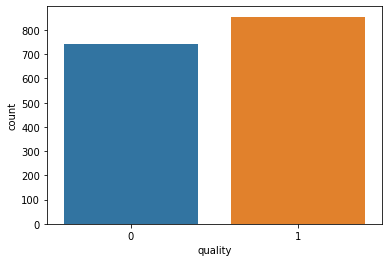

In [559]:
sns.countplot(df_wine['quality'])                #Count of both qualities
plt.show()

In [560]:
df_wine_cor=df_wine.corr()                          #To check the correlation
df_wine_cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.159129
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,-0.002160
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.109494
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.061757
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.231963
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.218072


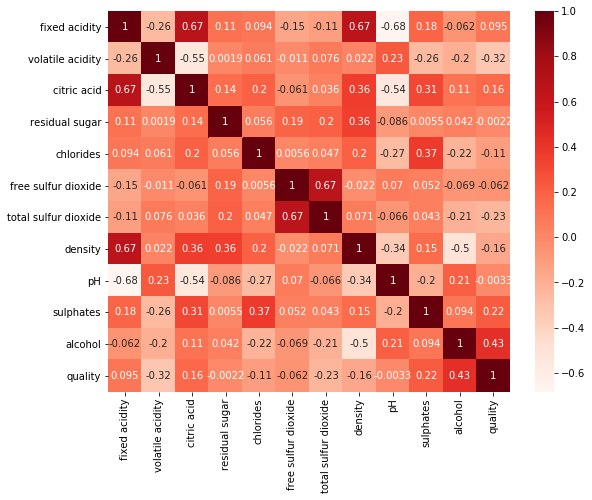

In [561]:
plt.figure(figsize=(9,7))
sns.heatmap(df_wine_cor,cmap='Reds',annot=True)

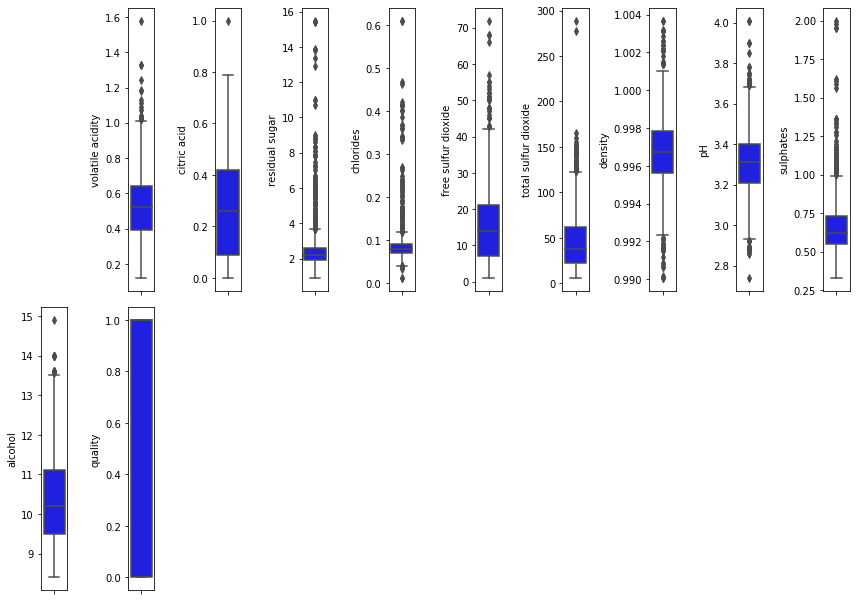

In [562]:
col_list=df_wine.columns.values
plt.figure(figsize=(12,50))                                    #Box plot to find out outliers
for i in range(1, len(col_list)):
    plt.subplot(12,10,i+1)
    sns.boxplot(df_wine[col_list[i]],color='blue',orient='v')
    plt.tight_layout()

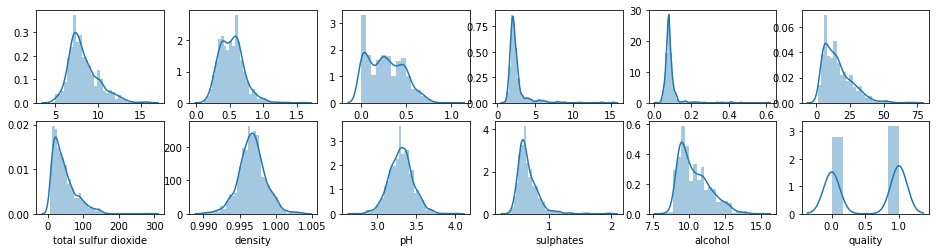

In [563]:
plt.figure(figsize=(16,16))
for i in range(0, len(col_list)):
    plt.subplot(8,6,i+1)
    sns.distplot(df_wine[col_list[i]])

In [564]:
from scipy.stats import zscore
z_score=abs(zscore(df_wine))
print(df_wine.shape)
df_wine_final=df_wine.loc[(z_score<3).all(axis=1)]                  
print(df_wine_final.shape)
#to quantify the outliers

(1599, 12)
(1458, 12)


In [565]:
df_wine=df_wine[(z_score<3).all(axis=1)]  
#to remove the outliers

In [566]:
df_wine.shape

(1458, 12)

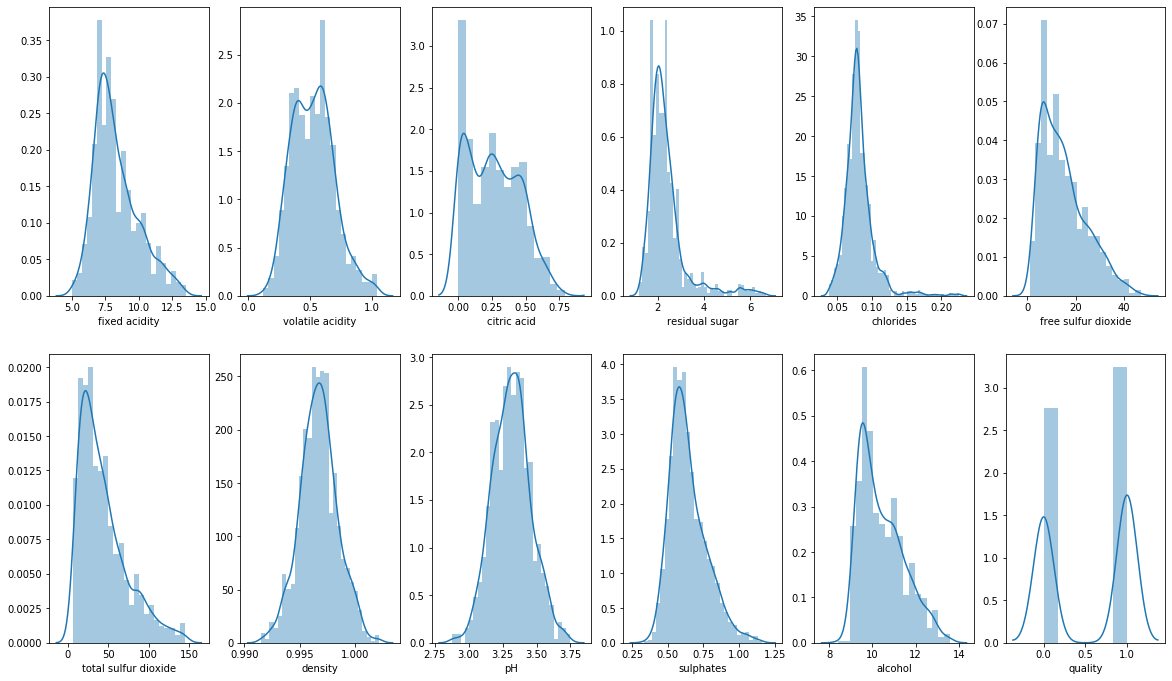

In [567]:
plt.figure(figsize=(20,50))
for i in range(0, len(col_list)):                                       #Distplot is used To check the skewness
    plt.subplot(8,6,i+1)
    sns.distplot(df_wine[col_list[i]])

In [568]:
from scipy.stats import boxcox
df_wine['residual sugar']=boxcox(df_wine['residual sugar'],0)               #Use of Log to reduce the skewness of data

In [569]:
df_wine['free sulfur dioxide']=boxcox(df_wine['free sulfur dioxide'],0)

In [570]:
df_wine['total sulfur dioxide']=boxcox(df_wine['total sulfur dioxide'],0)

In [571]:
df_wine['chlorides']=boxcox(df_wine['chlorides'],0)

In [572]:
df_wine['alcohol']=boxcox(df_wine['alcohol'],0)

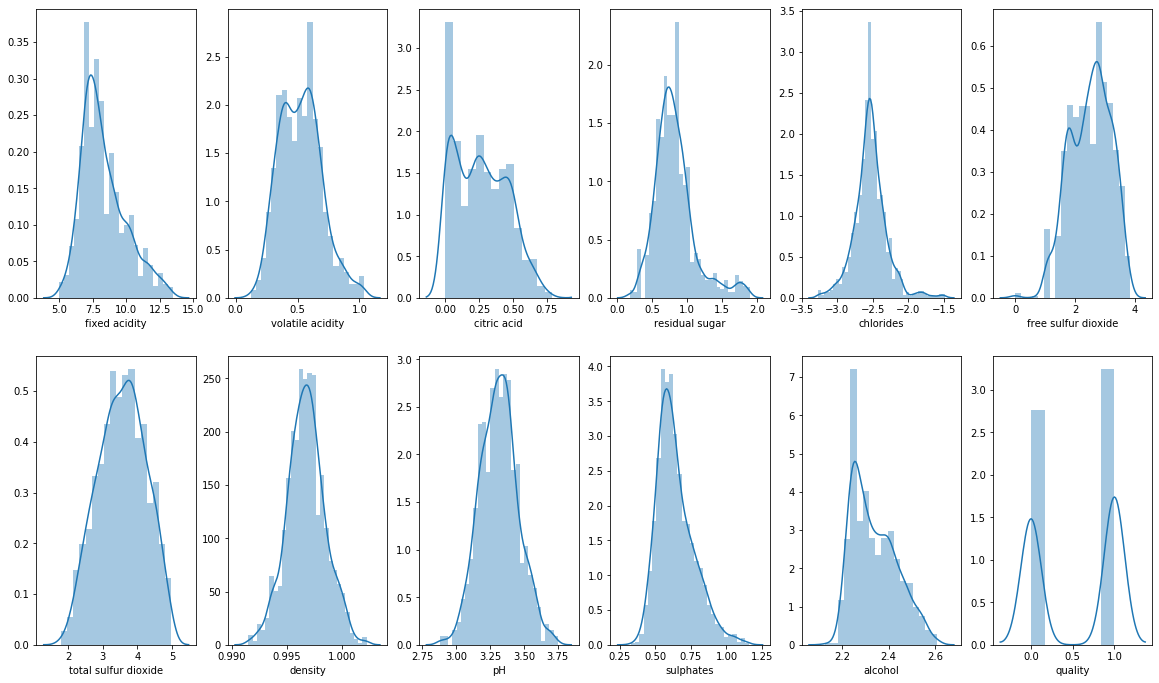

In [573]:
plt.figure(figsize=(20,50))
for i in range(0, len(col_list)):
    plt.subplot(8,6,i+1)
    sns.distplot(df_wine[col_list[i]])

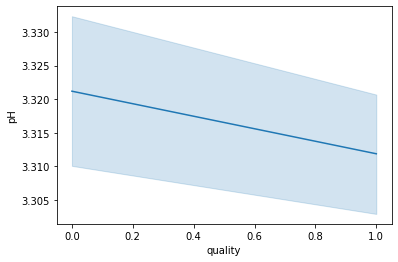

In [574]:
sns.lineplot(x=df_wine['quality'],y=df_wine['pH'],data=df_wine)
plt.show()                    
#Negative correlation between Quality and pH

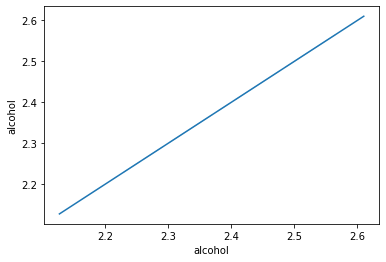

In [575]:
sns.lineplot(x=df_wine['alcohol'],y=df_wine['alcohol'],data=df_wine)
plt.show()
#Negative correlation between Quality and alcohol

In [576]:
x = df_wine.iloc[:,:11]
y = df_wine['quality']
#Spliting the data

In [577]:
x.shape

(1458, 11)

In [578]:
y.shape

(1458,)

In [579]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [580]:
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)

#The below output shows that we are not getting acceptable level of r2 score in most of the cases. It is a Classification problem

r2 score corresponding to random state:  42  is:  0.2652547090414714
r2 score corresponding to random state:  43  is:  0.30432618676595613
r2 score corresponding to random state:  44  is:  0.2903446991989552
r2 score corresponding to random state:  45  is:  0.3593069892141848
r2 score corresponding to random state:  46  is:  0.32117865380125843
r2 score corresponding to random state:  47  is:  0.2549804212366791
r2 score corresponding to random state:  48  is:  0.2617031820755453
r2 score corresponding to random state:  49  is:  0.364832214505893
r2 score corresponding to random state:  50  is:  0.2835519663009384
r2 score corresponding to random state:  51  is:  0.339304911633004
r2 score corresponding to random state:  52  is:  0.23297896666233875
r2 score corresponding to random state:  53  is:  0.25666221888608654
r2 score corresponding to random state:  54  is:  0.20942931741439075
r2 score corresponding to random state:  55  is:  0.3335269770456206
r2 score corresponding to rando

In [594]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(accuracy_score(y_test,predm))
#Testing the models along with their accuracy score

0.7122302158273381
0.7302158273381295
0.7050359712230215
0.7158273381294964


In [595]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(confusion_matrix(y_test,predm))
#Testing the models along with their confusion matrix

[[ 82  39]
 [ 39 118]]
[[ 87  34]
 [ 41 116]]
[[ 76  45]
 [ 37 120]]
[[ 93  28]
 [ 51 106]]


In [596]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(classification_report(y_test,predm))
#Testing the models along with their classification report

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       121
           1       0.77      0.76      0.77       157

    accuracy                           0.74       278
   macro avg       0.73      0.73      0.73       278
weighted avg       0.74      0.74      0.74       278

              precision    recall  f1-score   support

           0       0.68      0.72      0.70       121
           1       0.77      0.74      0.76       157

    accuracy                           0.73       278
   macro avg       0.73      0.73      0.73       278
weighted avg       0.73      0.73      0.73       278

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       121
           1       0.73      0.76      0.75       157

    accuracy                           0.71       278
   macro avg       0.70      0.70      0.70       278
weighted avg       0.70      0.71      0.70       278

              preci

In [597]:
#DecisionTreeClassifier and SVC have highest accuracy score, 
#now we are checking which model will give best accuracy score at optimum random_state
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.19)
    dtc=DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    y_pred=dtc.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    print("accuracy score corresponding to random state: ",r_state," is: ",accuracy_score)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state
print()
print()
print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)

accuracy score corresponding to random state:  42  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  43  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  44  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  45  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  46  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  47  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  48  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  49  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  50  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  51  is:  <functio

In [601]:
max_a_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.21)
    svc=SVC()
    svc.fit(x_train,y_train)
    y_pred=svc.predict(x_test)
    ac_scr=accuracy_score(y_test,y_pred)
    print("accuracy score corresponding to random state: ",r_state," is: ",accuracy_score)
    if ac_scr>max_a_score:
        max_a_score=ac_scr
        final_r_state=r_state
print()
print()
print('max accuracy score corresponding to ',final_r_state," is ",max_a_score)

accuracy score corresponding to random state:  42  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  43  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  44  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  45  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  46  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  47  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  48  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  49  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  50  is:  <function accuracy_score at 0x000000F7A8781828>
accuracy score corresponding to random state:  51  is:  <functio

In [593]:
#Cross Validation of DTC
from sklearn.model_selection import cross_val_score
cross_val_score(DecisionTreeClassifier(),x,y,cv=5,scoring='accuracy').mean()

0.6659770277267806

In [602]:
#Cross Validation of SVC
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(),x,y,cv=5,scoring='accuracy').mean()

0.7235983618133032

In [608]:
#since maximum accuracy score is coming around random state 51 and using SVC model, we will use that to create our model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=51,test_size=0.21)
svc=SVC(kernel='poly')            
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
y_pred=svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
#First we tried 'poly' kernel which gives 0.7687296416938111 accuracy score

0.7687296416938111
[[108  37]
 [ 34 128]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       145
           1       0.78      0.79      0.78       162

    accuracy                           0.77       307
   macro avg       0.77      0.77      0.77       307
weighted avg       0.77      0.77      0.77       307



In [609]:
svc=SVC(kernel='rbf')            
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
y_pred=svc.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
#Then we tried 'rbf' kernel which gives 0.8110749185667753 accuracy score

0.8110749185667753
[[115  30]
 [ 28 134]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       145
           1       0.82      0.83      0.82       162

    accuracy                           0.81       307
   macro avg       0.81      0.81      0.81       307
weighted avg       0.81      0.81      0.81       307



In [610]:
print(accuracy_score(y_test,y_pred))

0.8110749185667753


In [611]:
df_wine_pred=pd.DataFrame(y_pred)                #To save the prediction in csv
df_wine_pred.to_csv("Project5_Prediction.csv")